<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
          text-align: center; font-size:250%;border-radius:20px 80px;">FIFA 19 Players dataset</p>

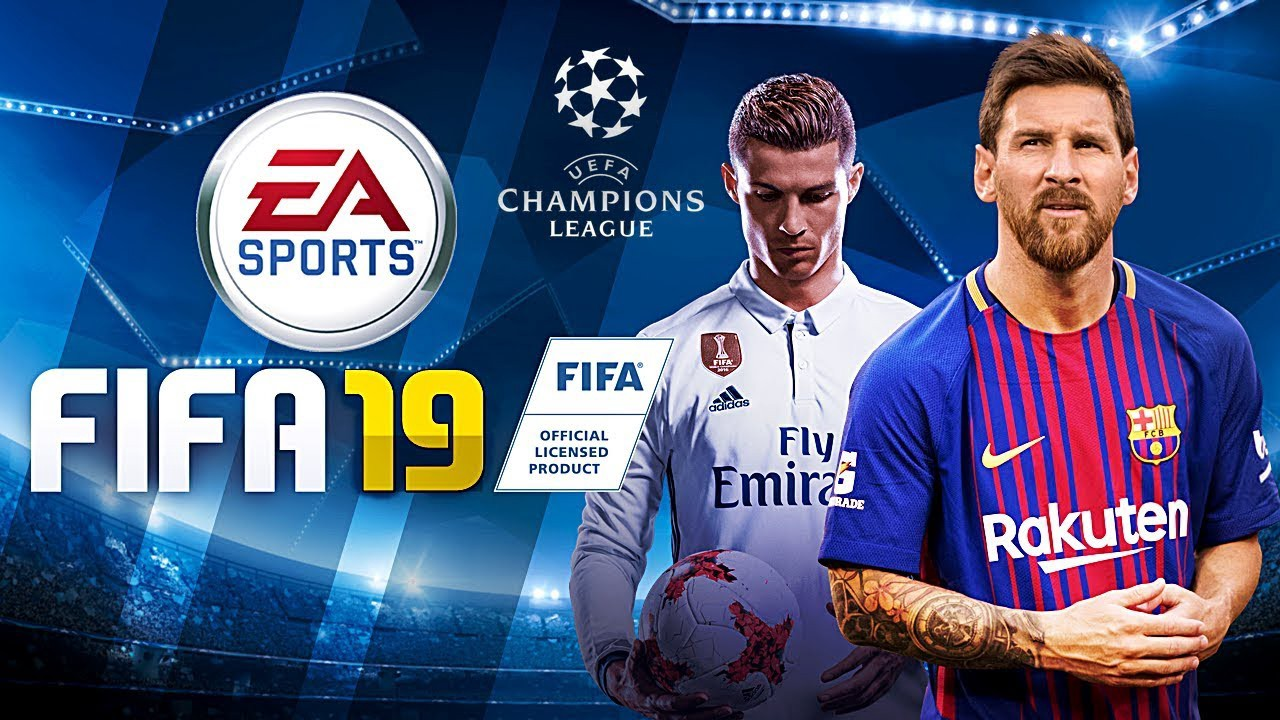

<b>🙋‍♂️🙋‍♀️ Hi all !!! we are going to work with Fifa 19 players dataset,If you like this notebook then plz consider a upvote for me and if don't plz drop your advise or comment so that i improve my skill 😎😎

<a id=""></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;"> 🚢Data Story</p>

<b><u>This dataset includes lastest edition FIFA 2019 players attributes like:-</u>
    
Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.
    
 
    
    

    
    
    
    
    
Reference : https://www.kaggle.com/karangadiya/fifa19    

<a id="1"></a>
<div class="list-group" id="1" role="tablist">
    
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🎰 Importing Libraries</p>

In [139]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
import missingno as msno
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from mlxtend.feature_selection import ExhaustiveFeatureSelector,SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_regression,SelectKBest
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline 


<a id="2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🎰 Load the dataset</p>

In [140]:
#Load the dataset and check the data head.
df=pd.read_csv("data.csv")
df.head().T

0  \
Unnamed: 0                                                   0   
ID                                                      158023   
Name                                                  L. Messi   
Age                                                         31   
Photo           https://cdn.sofifa.org/players/4/19/158023.png   
...                                                        ...   
GKHandling                                                11.0   
GKKicking                                                 15.0   
GKPositioning                                             14.0   
GKReflexes                                                 8.0   
Release Clause                                         €226.5M   

                                                            1  \
Unnamed: 0                                                  1   
ID                                                      20801   
Name                                        Cristiano Ronaldo   
Age                                                        33   
Photo           https://cdn.sofifa.org/players/4/19/20801.png   
...                                                       ...   
GKHandling                                               11.0   
GKKicking                                                15.0   
GKPositioning                                            14.0   
GKReflexes                                               11.0   
Release Clause                                        €127.1M   

                                                             2  \
Unnamed: 0                                                   2   
ID                                                      190871   
Name                                                 Neymar Jr   
Age                                                         26   
Photo           https://cdn.sofifa.org/players/4/19/190871.png   
...                                                        ...   
GKHandling                                                 9.0   
GKKicking                                                 15.0   
GKPositioning                                             15.0   
GKReflexes                                                11.0   
Release Clause                                         €228.1M   

                                                             3  \
Unnamed: 0                                                   3   
ID                                                      193080   
Name                                                    De Gea   
Age                                                         27   
Photo           https://cdn.sofifa.org/players/4/19/193080.png   
...                                                        ...   
GKHandling                                                85.0   
GKKicking                                                 87.0   
GKPositioning                                             88.0   
GKReflexes                                                94.0   
Release Clause                                         €138.6M   

                                                             4  
Unnamed: 0                                                   4  
ID                                                      192985  
Name                                              K. De Bruyne  
Age                                                         27  
Photo           https://cdn.sofifa.org/players/4/19/192985.png  
...                                                        ...  
GKHandling                                                13.0  
GKKicking                                                  5.0  
GKPositioning                                             10.0  
GKReflexes                                                13.0  
Release Clause                                         €196.4M  

[89 rows x 5 columns]

In [141]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

<a id="2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📝 Meta information 
    about Dataframe</p>

In [142]:
#check the rows and columns number.
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 18207 and number of columns:--> 89


In [143]:
#chack the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

<a id="3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🛒Missing values </p>

In [144]:
#check for missing values 
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

Missing_Number  Missing_Percent
Loaned From           16943         0.930576
LWB                    2085         0.114516
LCM                    2085         0.114516
RS                     2085         0.114516
LW                     2085         0.114516
...                     ...              ...
Nationality               0         0.000000
Photo                     0         0.000000
Age                       0         0.000000
Name                      0         0.000000
Unnamed: 0                0         0.000000

[89 rows x 2 columns]

<AxesSubplot:>

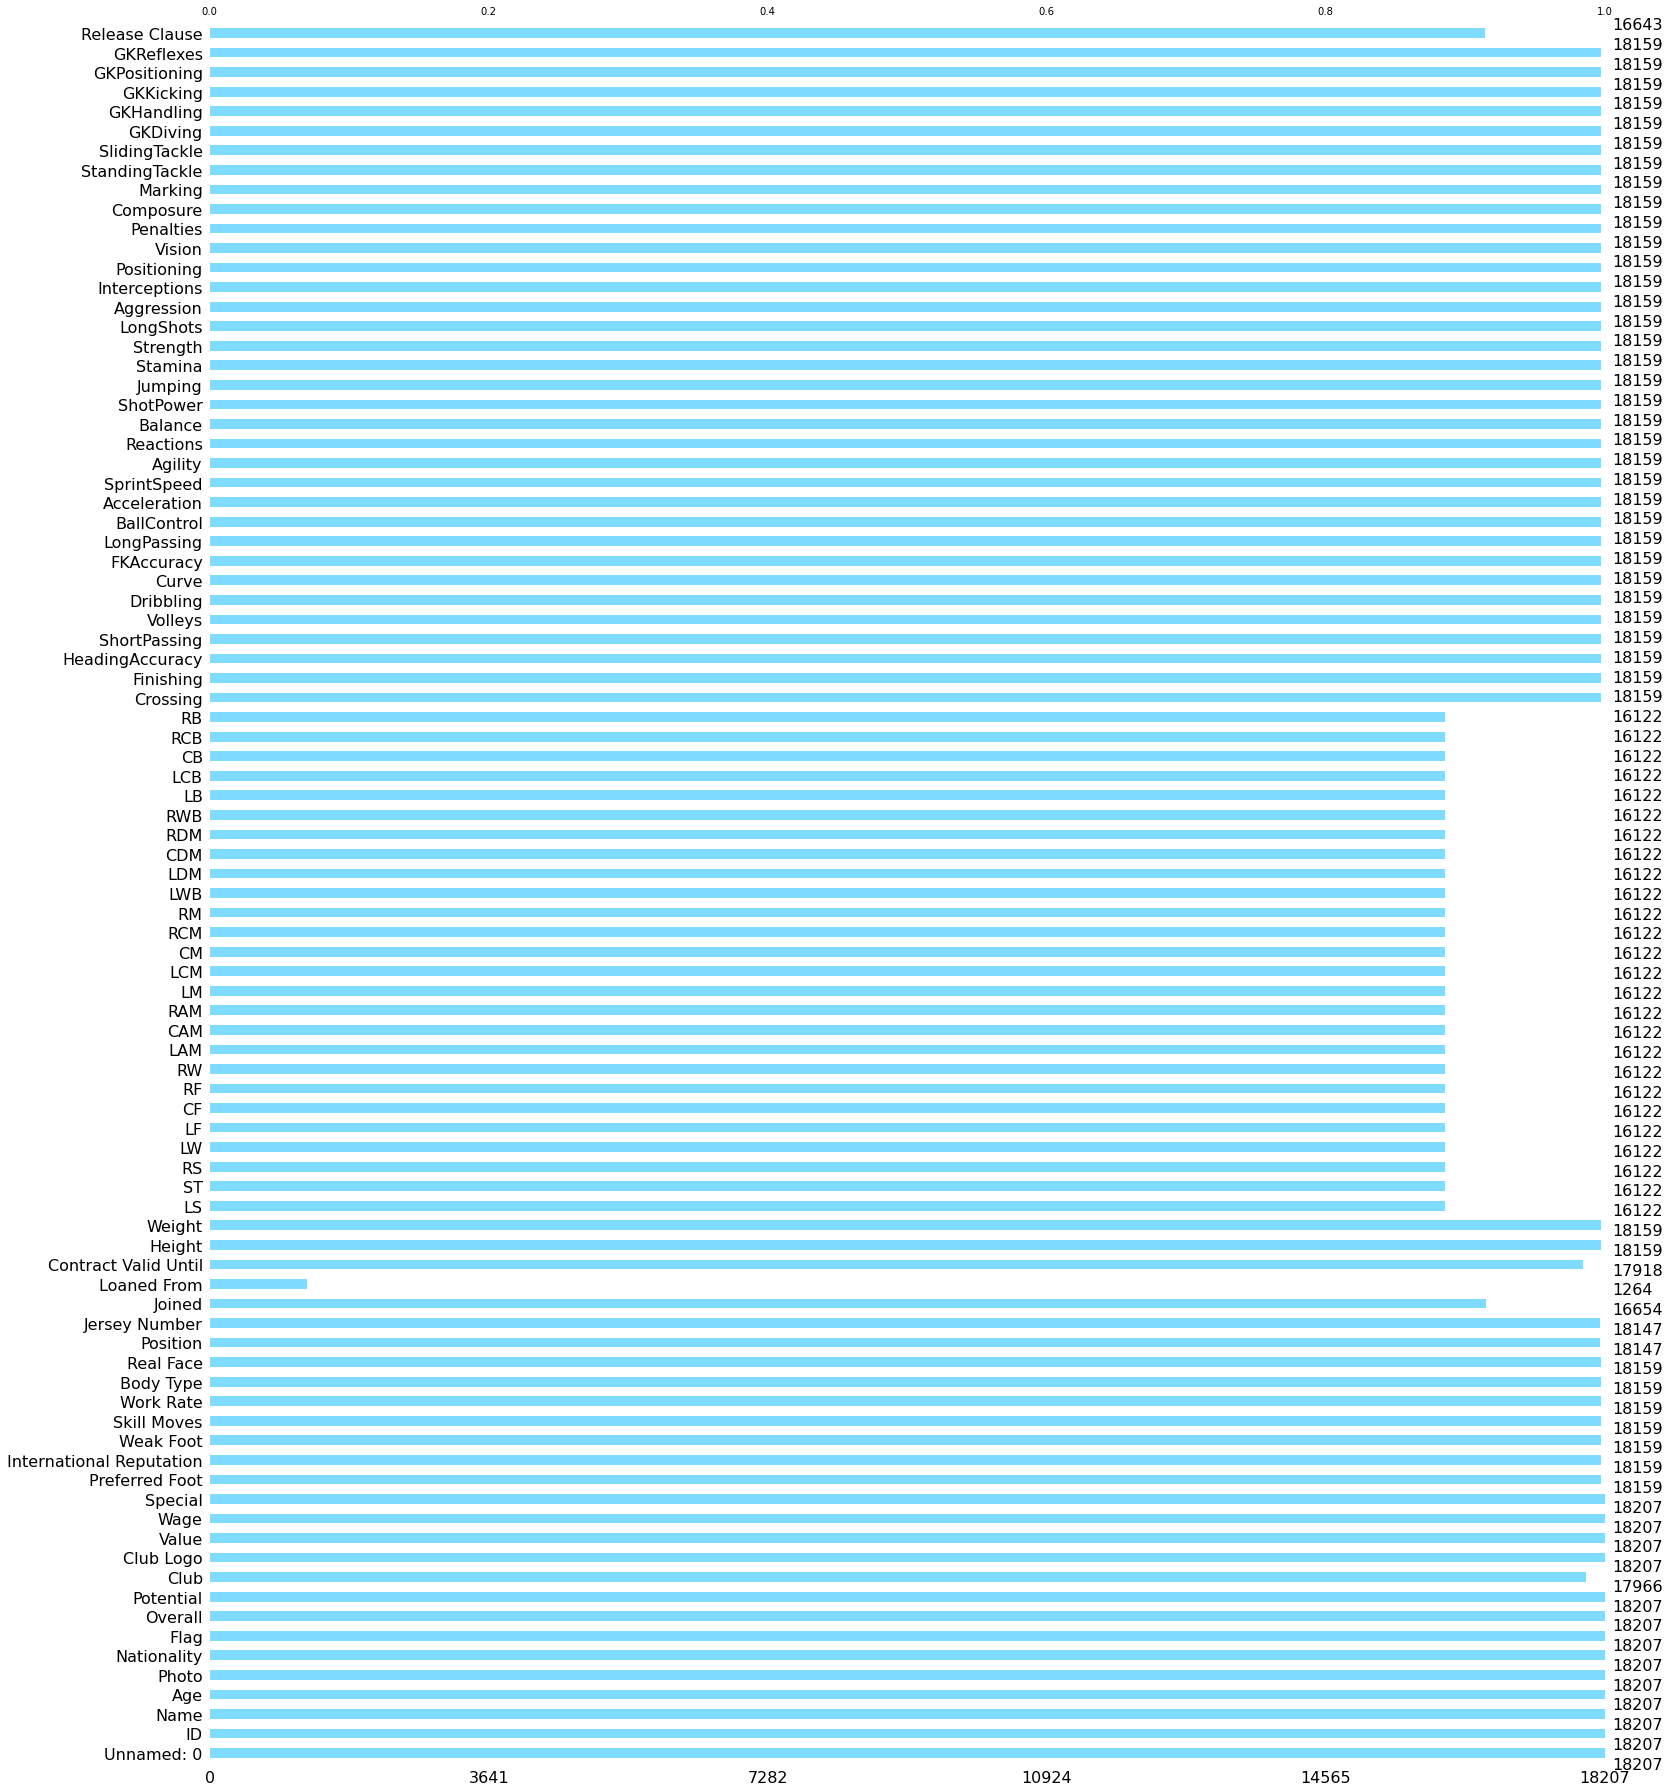

In [145]:
msno.bar(df,color='#7FDBFF',orientation="h")

<b>Too much missing values 😫😫,we will fix it later !
   

<b>we got some of the rows are almost empty or contain some data/values ,let's find their index and remove them .to find them we use the height and weight columns because these two columns are contain no missing values except those rows 😎
    

In [146]:
miss_height = df[df['Height'].isnull()].index.tolist()
miss_weight = df[df['Weight'].isnull()].index.tolist()

#check if the dataset contain the completly empty rows 
if miss_height == miss_weight:
    print('Yes,empty rows exist😐😐')
else:
    print('Not found 😃😃')

Yes,empty rows exist😐😐


In [147]:
#lets remove them 
df.drop(df.index[miss_height],inplace=True)

<a id="3.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🤼‍♀️Duplicated rows </p>

In [148]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 0


<b>No duplicted rows found , great 😁

<a id="4"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📈 Statistical information of Dataframe </p>

In [149]:
#check data description
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='mako').background_gradient(subset=['50%'], cmap='coolwarm')

<a id="2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📝 Data Cleaning+Processing</p>

In [150]:
df.drop(['Unnamed: 0',"ID",'Photo','Flag','Club Logo','Real Face','Jersey Number','Loaned From','Release Clause'],
          axis=1,inplace=True)

In [151]:
#cleaning the value and wage col
def m_and_k(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)
    
df["Value"]=df["Value"].apply(lambda x:m_and_k(x))
df["Wage"]=df["Wage"].apply(lambda x:m_and_k(x))

In [152]:
df[["Value","Wage"]].head(10).T

0           1            2           3            4  \
Value  110500000.0  77000000.0  118500000.0  72000000.0  102000000.0   
Wage      565000.0    405000.0     290000.0    260000.0     355000.0   

                5           6           7           8           9  
Value  93000000.0  67000000.0  80000000.0  51000000.0  68000000.0  
Wage     340000.0    420000.0    455000.0    380000.0     94000.0

In [153]:
df.head()

Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special Preferred Foot  ...  \
0         FC Barcelona  110500000.0  565000.0     2202           Left  ...   
1             Juventus   77000000.0  405000.0     2228          Right  ...   
2  Paris Saint-Germain  118500000.0  290000.0     2143          Right  ...   
3    Manchester United   72000000.0  260000.0     1471          Right  ...   
4      Manchester City  102000000.0  355000.0     2281          Right  ...   

   Penalties  Composure  Marking StandingTackle SlidingTackle GKDiving  \
0       75.0       96.0     33.0           28.0          26.0      6.0   
1       85.0       95.0     28.0           31.0          23.0      7.0   
2       81.0       94.0     27.0           24.0          33.0      9.0   
3       40.0       68.0     15.0           21.0          13.0     90.0   
4       79.0       88.0     68.0           58.0          51.0     15.0   

  GKHandling GKKicking GKPositioning GKReflexes  
0       11.0      15.0          14.0        8.0  
1       11.0      15.0          14.0       11.0  
2        9.0      15.0          15.0       11.0  
3       85.0      87.0          88.0       94.0  
4       13.0       5.0          10.0       13.0  

[5 rows x 80 columns]

In [154]:
#clean and preprocess the Joined columns
df["Joined"]=pd.to_datetime(df["Joined"])
df["Joined"]=pd.DatetimeIndex(df["Joined"]).year
df["Joined"]=df["Joined"].replace(np.nan,0)
df["Joined"]=df["Joined"].astype(str)

In [155]:
df["Joined"].head()

0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: object

In [156]:
#clean and preprocess the Contract Valid Until columns
df["Contract Valid Until"]=pd.to_datetime(df["Contract Valid Until"])
df["Contract Valid Until"]=pd.DatetimeIndex(df["Contract Valid Until"]).year
df["Contract Valid Until"]=df["Contract Valid Until"].replace(np.nan,0)
df["Contract Valid Until"]=df["Contract Valid Until"].astype(str)

In [157]:
#clean and process the height columns 
def clean_height(val):
    test=[]
    value=[]
    if isinstance(val,str):
        test=val.split("'")
        i=test[0]
        j=test[1]
        value=(int(i*12)+int(j))/12
    return(value)   
df["Height"]=df["Height"].apply(clean_height) 


In [158]:
#clean and process the Weight columns 
def clean_weight(val):
    if isinstance(val,str):
        return(val.replace("lbs",""))   
df["Weight"]=df["Weight"].apply(clean_weight) 
df["Weight"]=df["Weight"].astype(float)


<a id="6"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 EDA & Visualization</p>

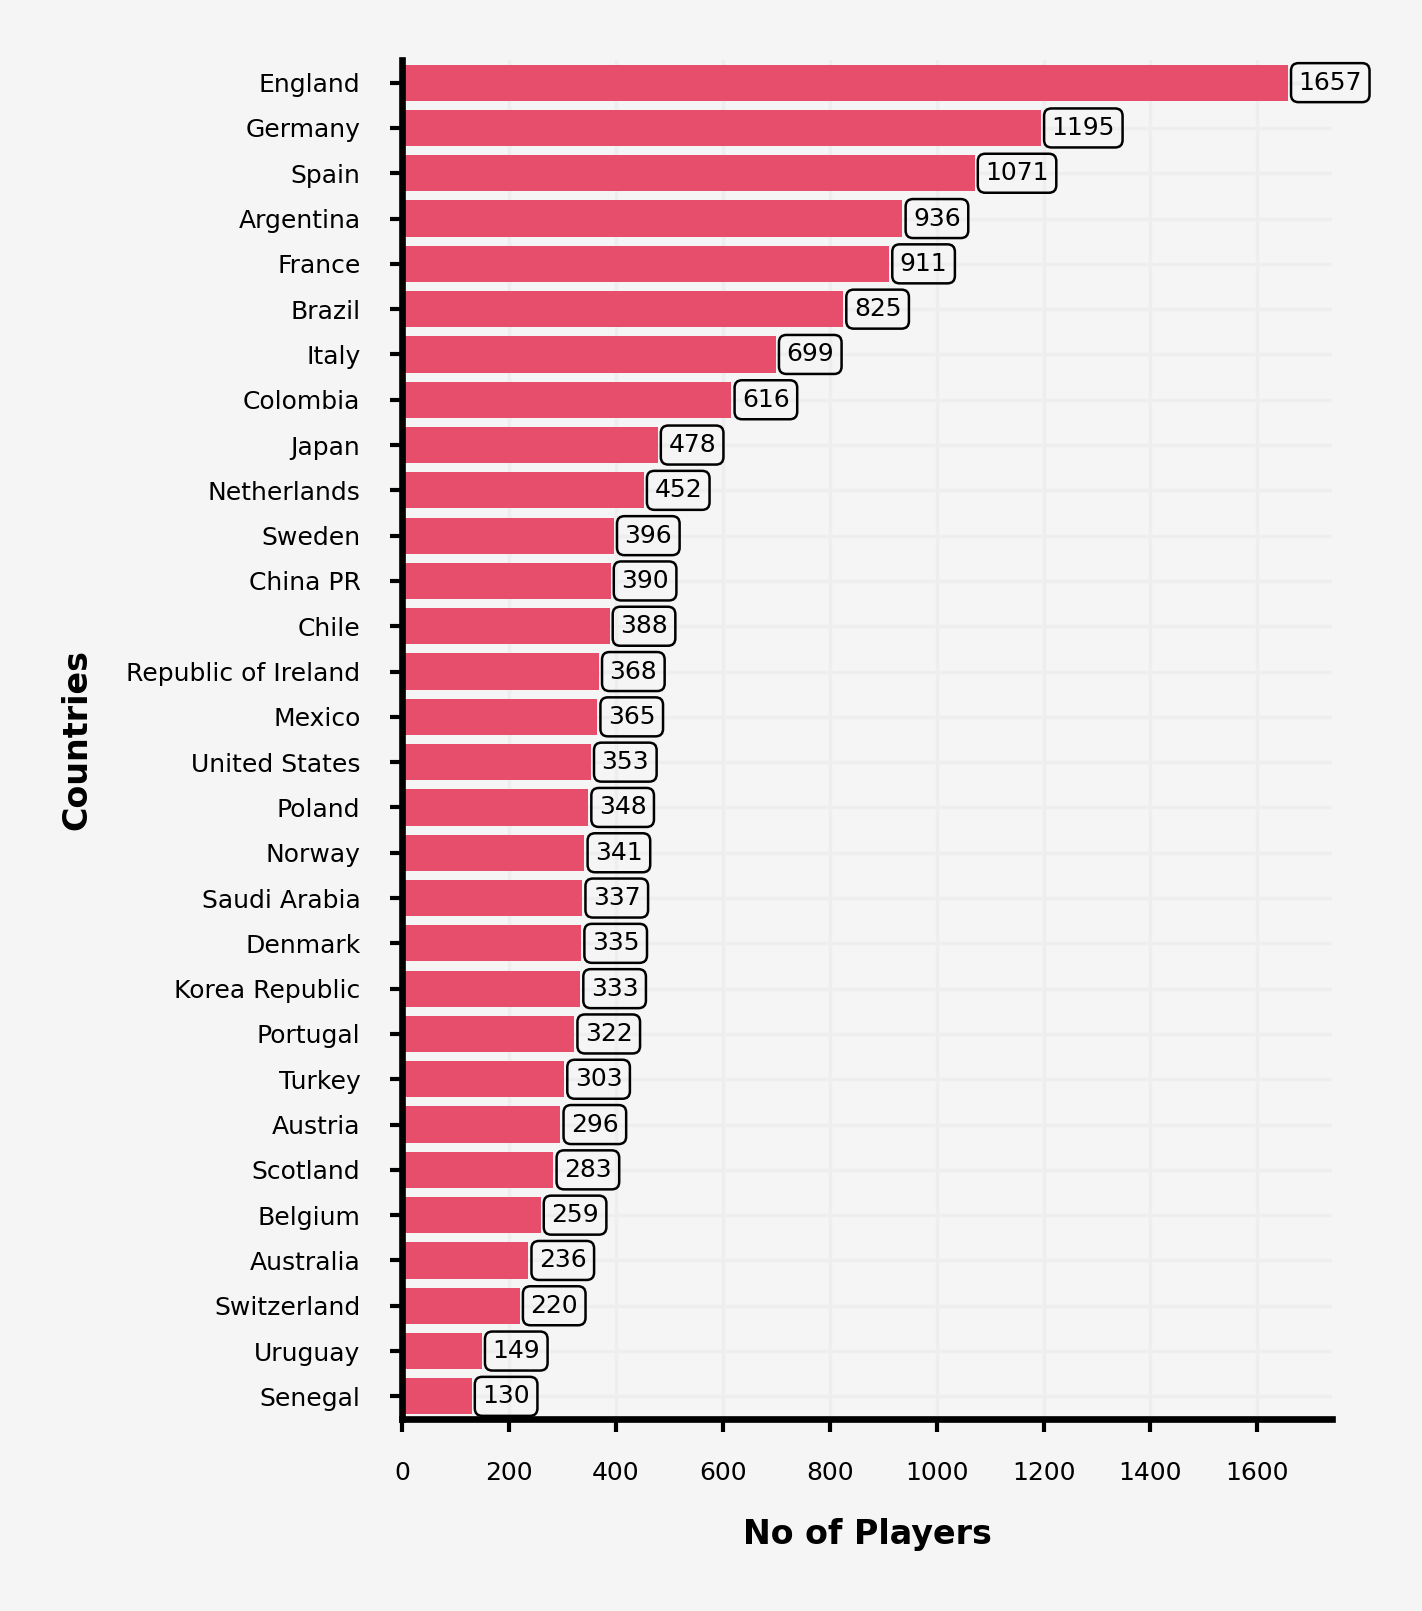

In [159]:
#top 30 contries with highset numbers of players 
y = df.Nationality.value_counts().head(30).index
x = df.Nationality.value_counts().head(30).values

# Athletes barplot with Discipline
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=df,x=x,y=y,zorder=2) 
ax0_sns.set_xlabel('No of Players',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Countries',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)


for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 20
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()



<b>European contries players are most here
    

In [160]:
#analysis the club columns
print("Here total numbers of club are:",df["Club"].nunique())

Here total numbers of club are: 651


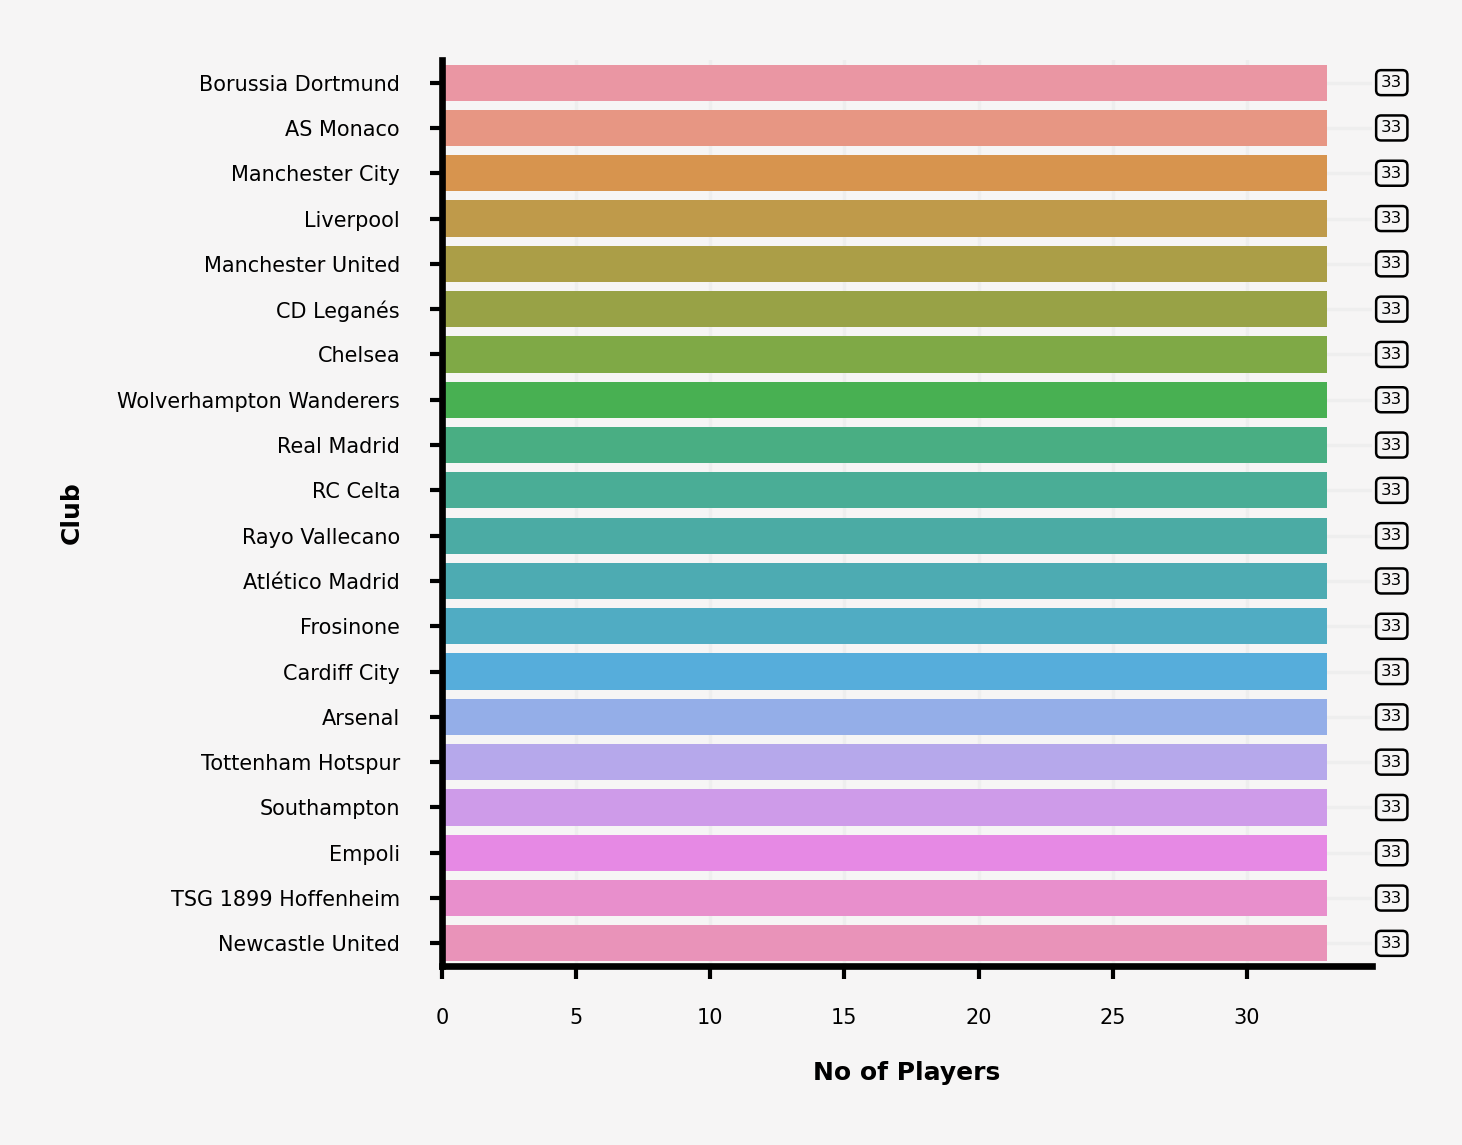

In [161]:
#top 20 club with highest numbers of players 
y = df.Club.value_counts().head(20).index
x = df.Club.value_counts().head(20).values
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#00FFFF'])
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=df,x=x,y=y,zorder=2) 
ax0_sns.set_xlabel('No of Players',fontsize=3, weight='bold')
ax0_sns.set_ylabel('Club',fontsize=3, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=2.5, width=0.5, length=1.5)


for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() +2
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=2, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()



In [162]:
#analysis the max and minimum potential and  overall performanced players 
print('Maximum Potential player :---> '+str(df.loc[df['Potential'].idxmax()][0]))
print('Maximum Overall Perforamnced player:---> '+str(df.loc[df['Overall'].idxmax()][0]))
print()
print('Minimum Potential player:---> '+str(df.loc[df['Potential'].idxmin()][0]))
print('Minimum Overall Perforamnced player:---> '+str(df.loc[df['Overall'].idxmin()][0]))

Maximum Potential player :---> K. Mbappé
Maximum Overall Perforamnced player:---> L. Messi

Minimum Potential player:---> Y. Uchimura
Minimum Overall Perforamnced player:---> G. Nugent


In [163]:
#top 10 maximum potential and overall performenced players 
top_potential=df.sort_values(by="Potential",ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=top_potential.Name,
    x=top_potential.Potential,
   orientation='h',
    name='potential',
    marker=dict(
        color='rgba(300, 200, 100, 50)',
        line=dict(color='rgba(246, 78, 139, 1.0)')
    )
    ))

template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=30)))

fig.update_layout(
                title = 'Top 10 potential players',template = template,barmode='stack', autosize=False,width=650,
                height=400,margin=dict( l=100,r=100, b=30,t=100, pad=4
                          )
)

fig.show()

       

In [164]:
top_overall=df.sort_values(by="Overall",ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=top_overall.Name,
    x=top_overall.Overall,
   orientation='h',
    name='potential',
    marker=dict(
        color='rgba(100, 200, 100, 50)',
        line=dict(color='rgba(246, 78, 139, 1.0)')
    )
    ))

template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=30)))

fig.update_layout(
                title = 'Top 10 Overall performanced players',template = template,barmode='stack', autosize=False,width=650,
                height=400,margin=dict( l=100,r=100, b=30,t=100, pad=4
                          )
)

fig.show()

       

In [165]:
#Best in others aspect 
best_players=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print("Best in others aspect :")
print("\n<----------------------------------------------------------------->\n")
for i in best_players:
    print('Best {0}:{1} '.format(i,df.loc[df[i].idxmax()][0]))
print("\n<----------------------------------------------------------------->\n")    

Best in others aspect :

<----------------------------------------------------------------->

Best Crossing:K. De Bruyne 
Best Finishing:L. Messi 
Best HeadingAccuracy:Naldo 
Best ShortPassing:L. Modrić 
Best Volleys:E. Cavani 
Best Dribbling:L. Messi 
Best Curve:Quaresma 
Best FKAccuracy:L. Messi 
Best LongPassing:T. Kroos 
Best BallControl:L. Messi 
Best Acceleration:Douglas Costa 
Best SprintSpeed:K. Mbappé 
Best Agility:Neymar Jr 
Best Reactions:Cristiano Ronaldo 
Best Balance:Bernard 
Best ShotPower:Cristiano Ronaldo 
Best Jumping:Cristiano Ronaldo 
Best Stamina:N. Kanté 
Best Strength:A. Akinfenwa 
Best LongShots:L. Messi 
Best Aggression:B. Pearson 
Best Interceptions:N. Kanté 
Best Positioning:Cristiano Ronaldo 
Best Vision:L. Messi 
Best Penalties:M. Balotelli 
Best Composure:L. Messi 
Best Marking:A. Barzagli 
Best StandingTackle:G. Chiellini 
Best SlidingTackle:Sergio Ramos 
Best GKDiving:De Gea 
Best GKHandling:J. Oblak 
Best GKKicking:M. Neuer 
Best GKPositioning:G. Buffon

In [166]:
#Most valuable and highest earners players
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][0]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][0]))

Most valued player : Neymar Jr
Highest earner : L. Messi


In [167]:
#Top 10 most valued players and highest earners players
top_values=df.sort_values(by="Value",ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=top_values.Name,
    x=top_values.Value,
   orientation='h',
    name='potential',
    marker=dict(
        color='rgba(30, 200, 100, 100)',
        line=dict(color='rgba(246, 78, 139, 1.0)')
    )
    ))

template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=30)))

fig.update_layout(
                title = 'Top 10 valuable players',template = template,barmode='stack', autosize=False,width=650,
                height=400,margin=dict( l=100,r=100, b=30,t=100, pad=4
                          )
)

fig.show()

       

In [168]:
#Top 10 most valued players and highest earners players
top_earners=df.sort_values(by="Wage",ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=top_earners.Name,
    x=top_earners.Wage,
   orientation='h',
    name='potential',
    marker=dict(
        color='rgba(70, 20, 100, 10)',
        line=dict(color='rgba(246, 78, 139, 1.0)')
    )
    ))

template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=30)))

fig.update_layout(
                title = 'Top 10 Earners player',template = template,barmode='stack', autosize=False,width=650,
                height=400,margin=dict( l=100,r=100, b=30,t=100, pad=4
                          )
)

fig.show()

       

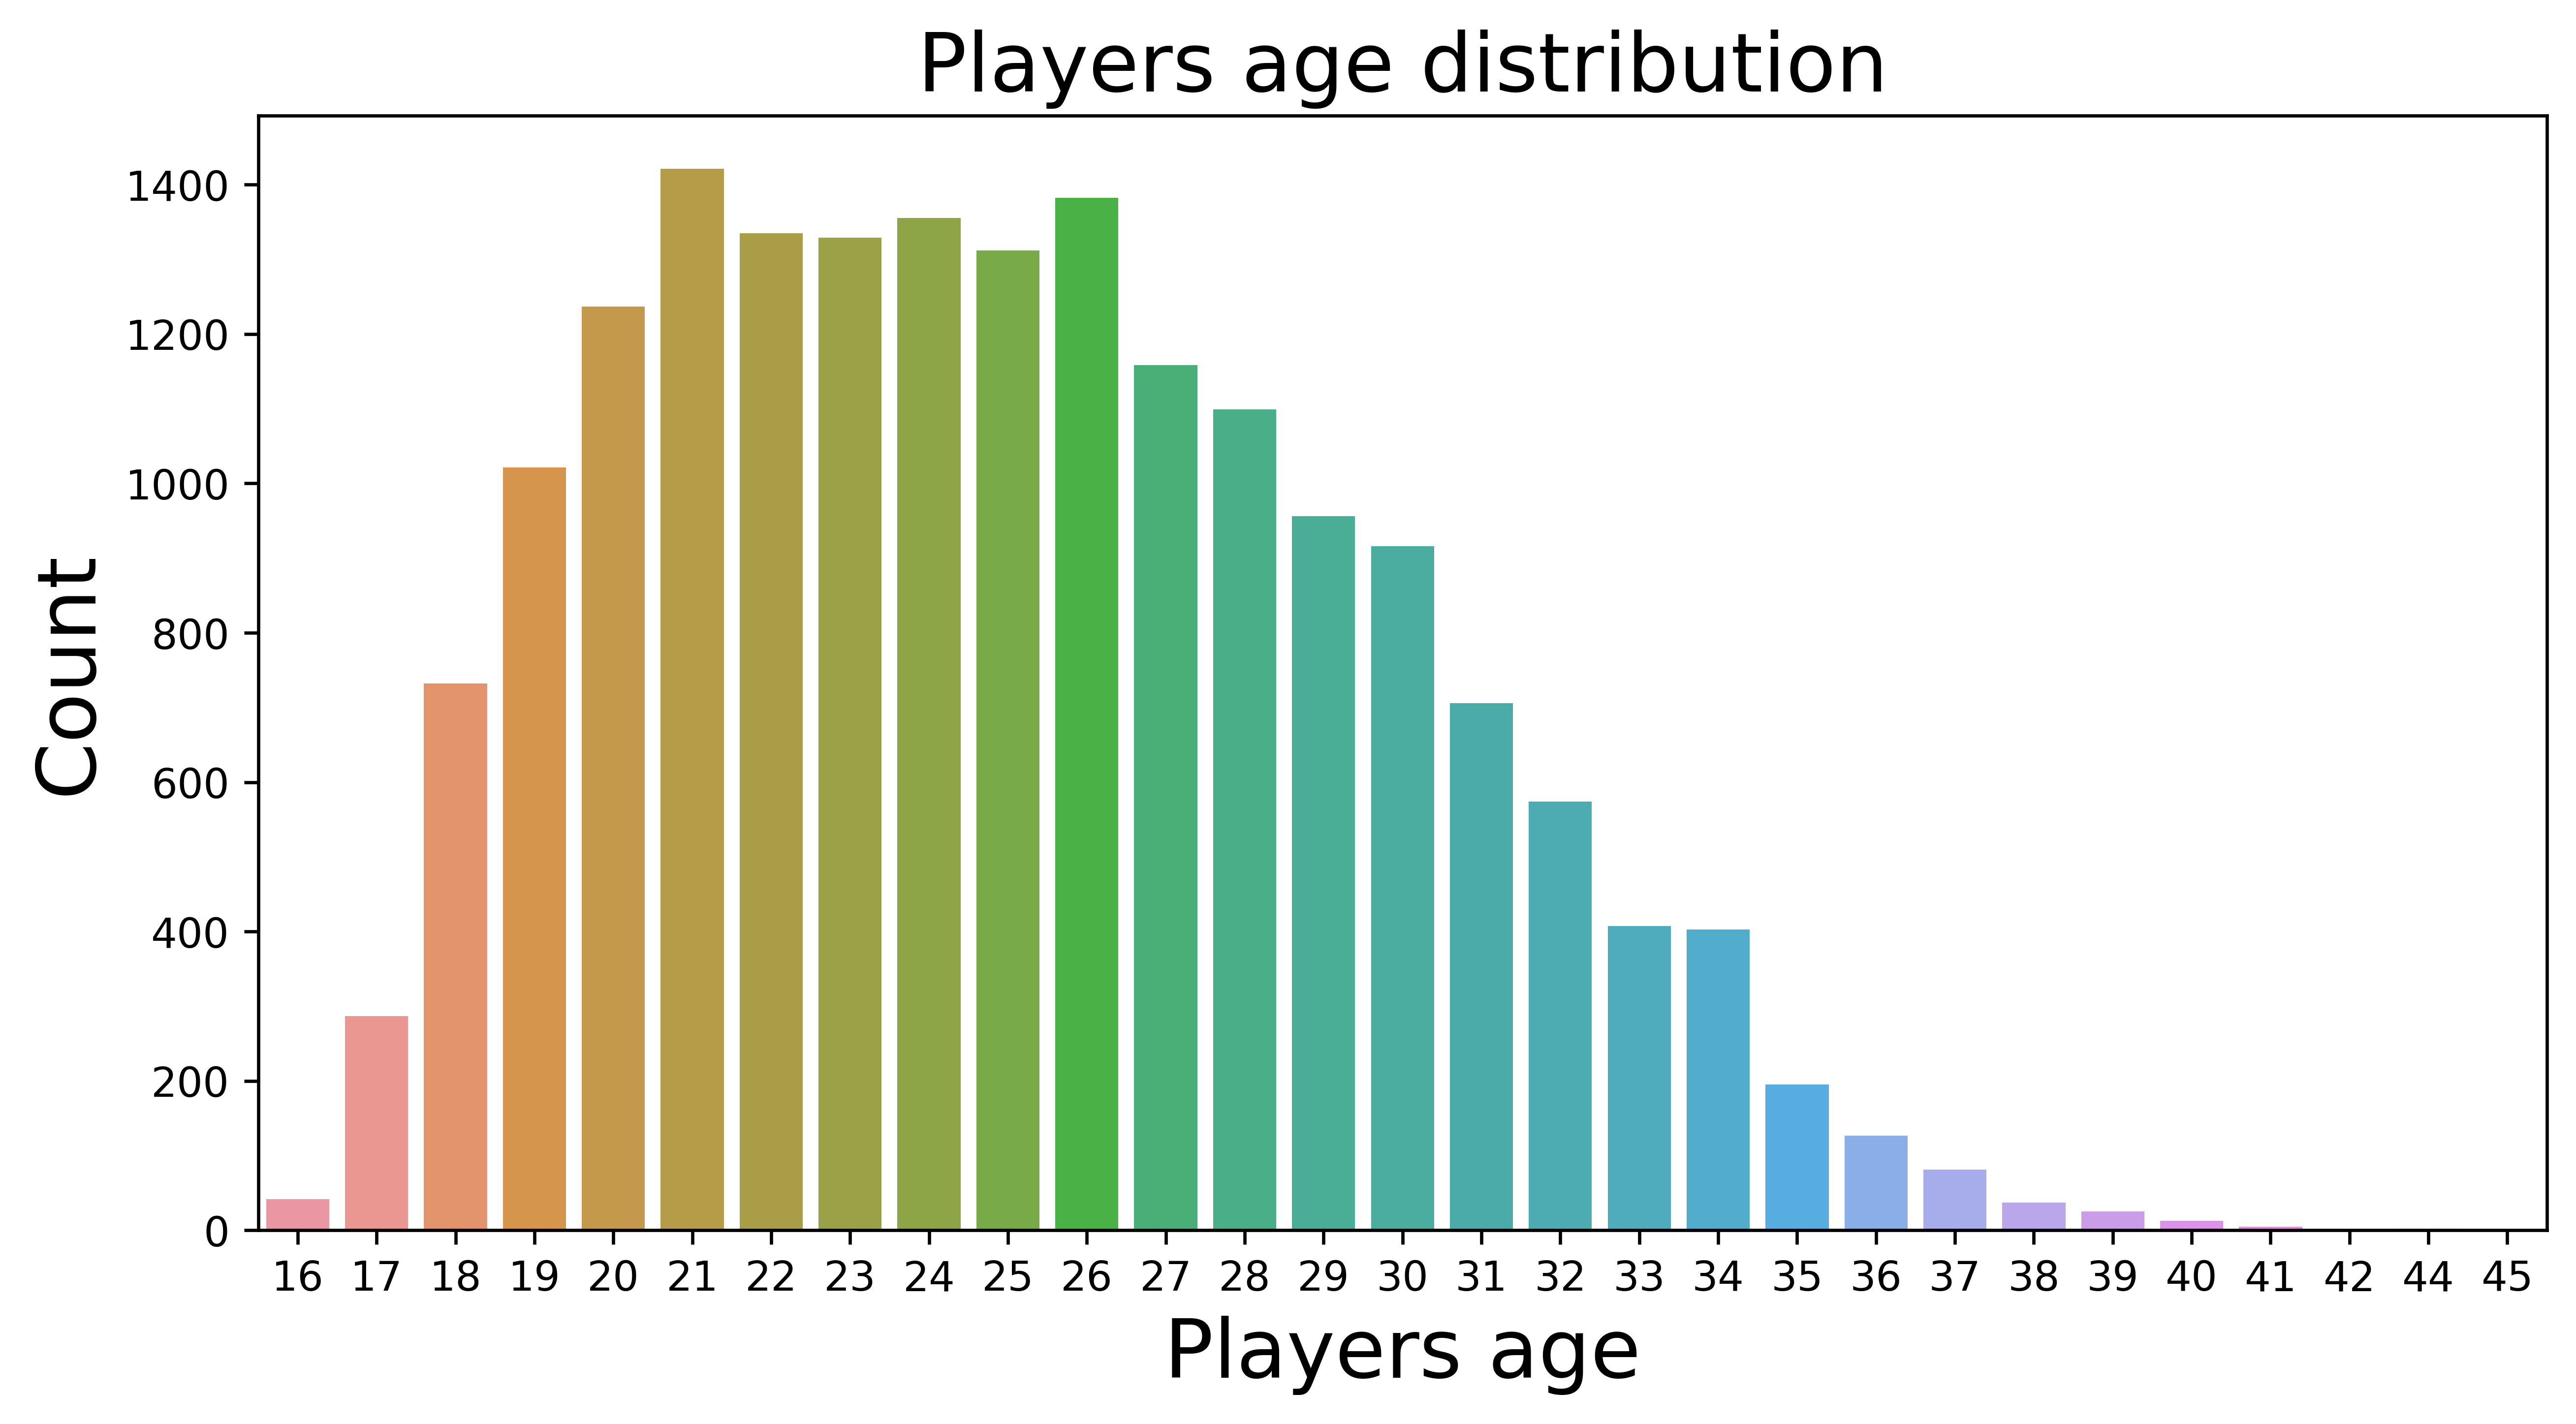

In [169]:
#age columns analysis
plt.figure(figsize=(10,5))
sns.countplot(df["Age"])
plt.title("Players age distribution",fontsize=20)
plt.xlabel("Players age",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

<b>Most of the players age lies between 19 to 29

In [170]:
#analysis age vs potential ,overall performance,Dribling,stamina,strength,Balance col
data=['Overall', 'Potential']
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
for col in data:
    fig = px.scatter(data_frame = df,
             x = "Age",
             y=col,color_discrete_sequence=colors,color_continuous_scale=colors
            ,template='plotly_dark', width=500,height=350)

    fig.show()
   

<b>Analysis:
    As the age is increases ,overall performance,potential is decreases.

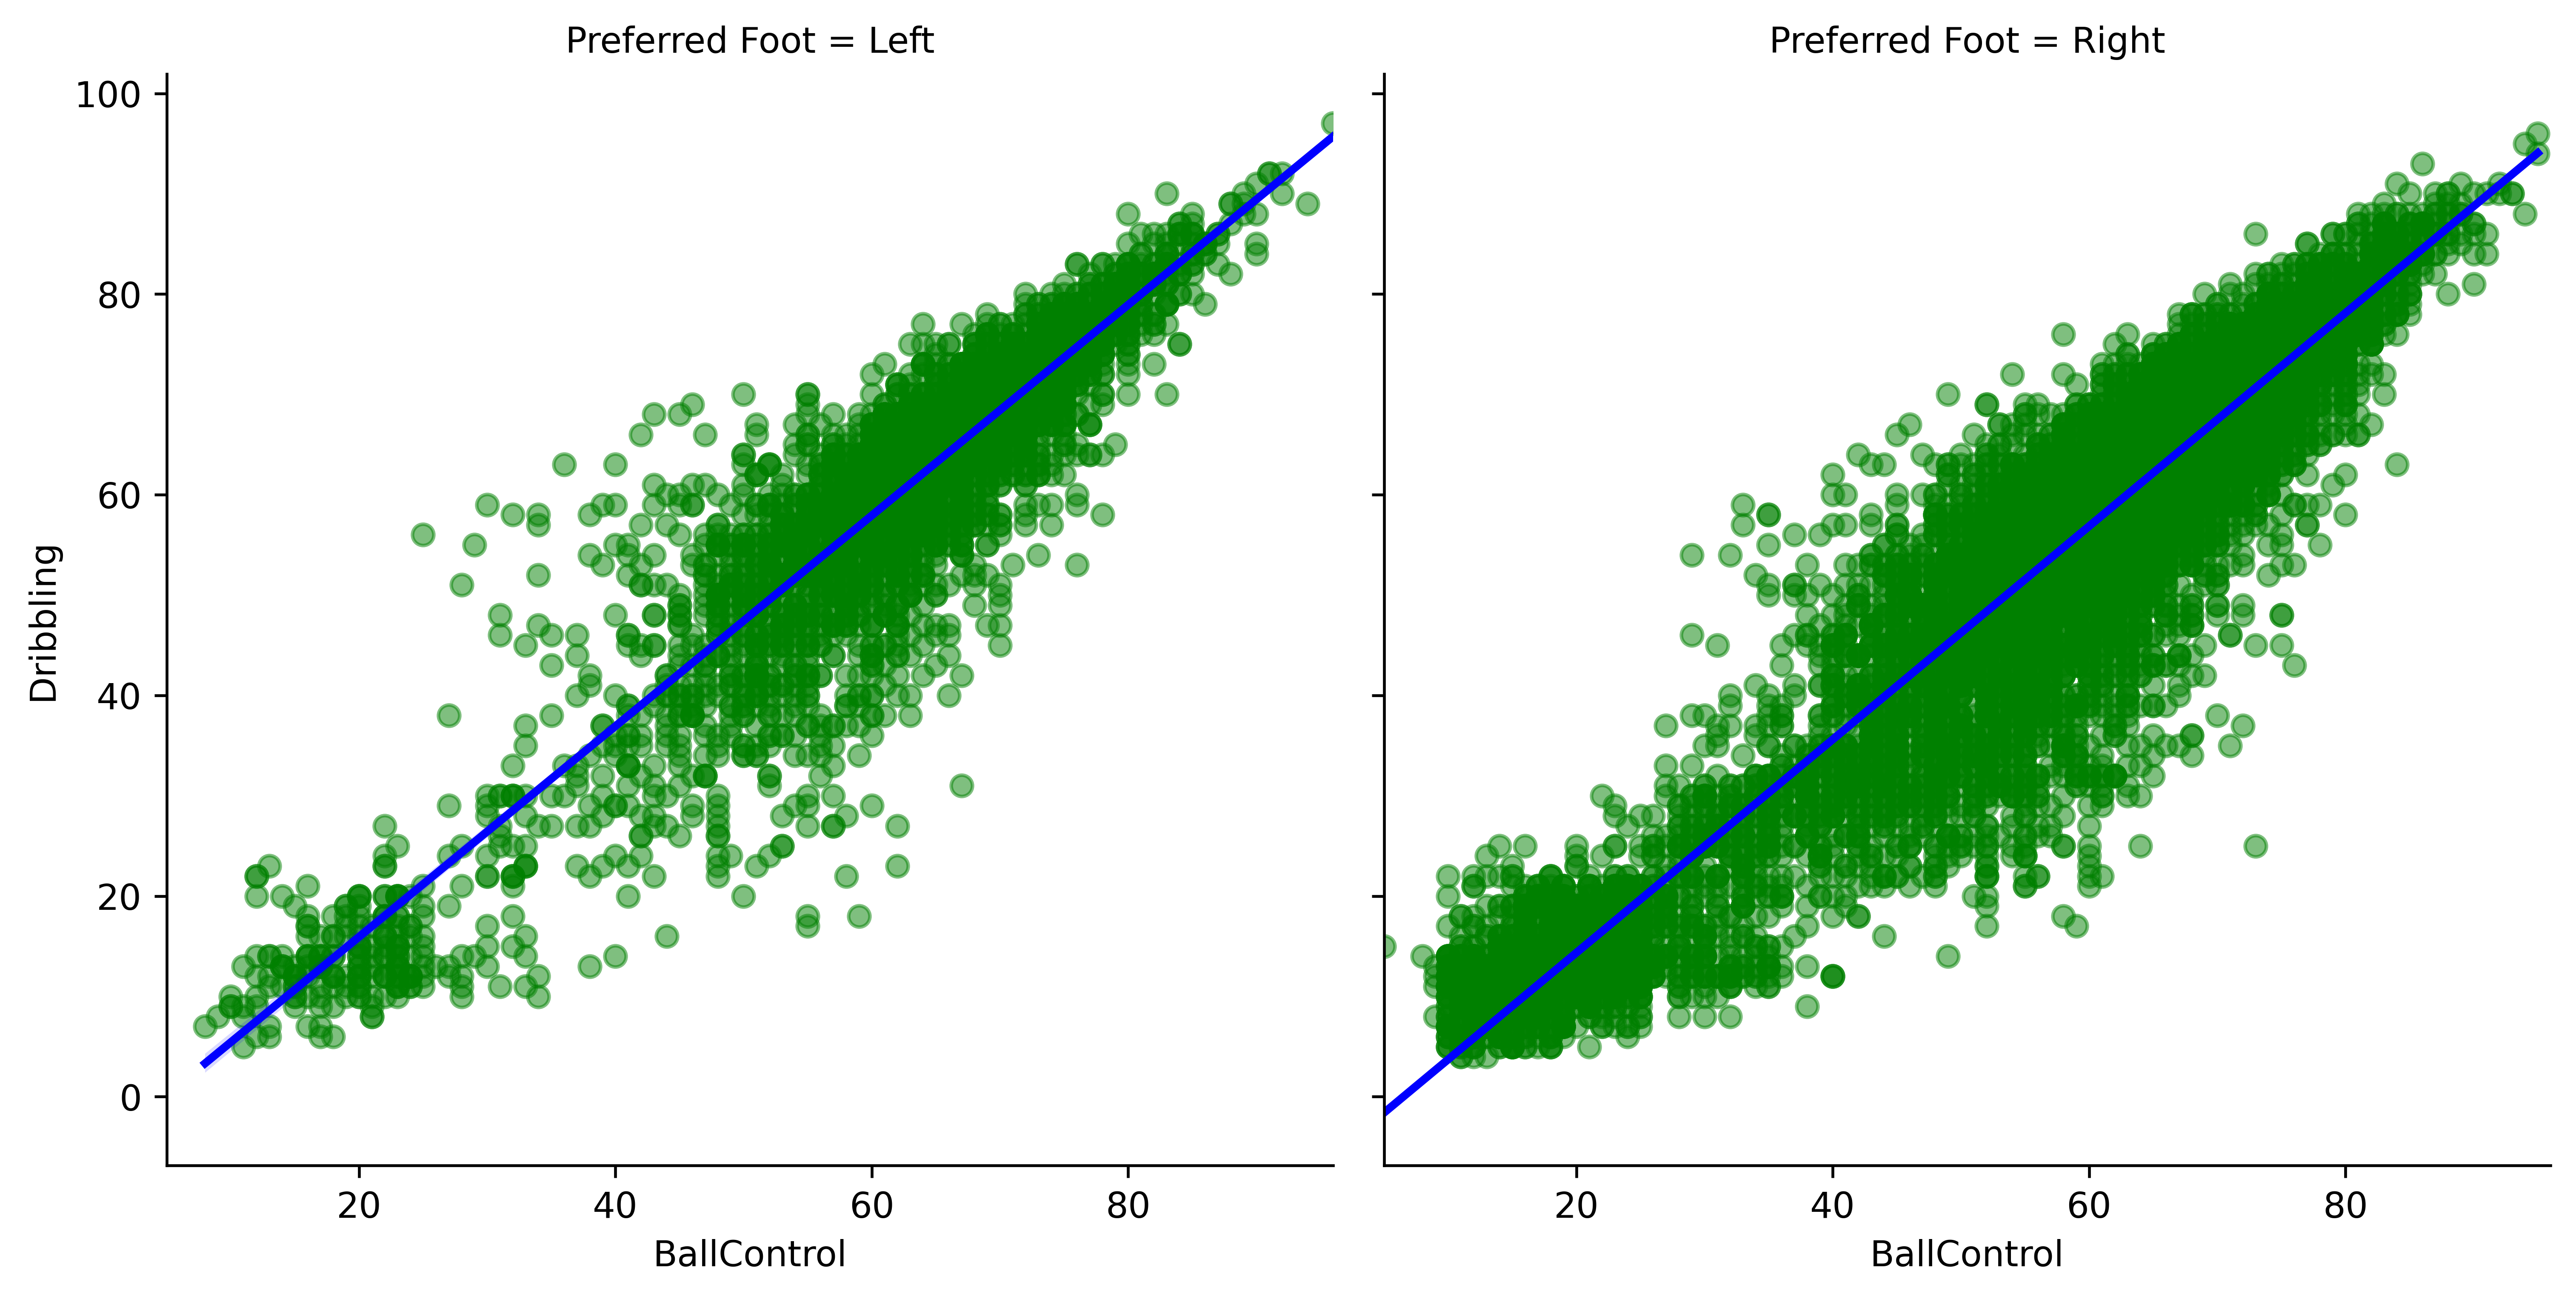

In [171]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.5,'color':'green'},
           line_kws={'color':'blue'})

In [172]:
fig = px.pie(df, names = "Preferred Foot",
             title = "<b>Counts in Preferred Foot</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 2)))


fig.show()

<b>Most of the players are right in preferred foot

In [173]:
fig = px.pie(df, names = "Work Rate",
             title = "<b>Counts in Work Rate</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=500)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 2)))


fig.show()

In [174]:
#analysis overall performance and age with respect to preferred foot
#plt.rcParams['figure.figsize'] = (20, 7)
plt.figure(figsize=(20,12))
sns.boxenplot(df["Age"],df["Overall"],hue=df["Preferred Foot"])
plt.title("Players age vs overall performance wrt preferred foot",fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Players age",fontsize=20)
plt.ylabel("Overall",fontsize=20)
plt.show()

In [175]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]
df_small.head()

Age  Overall  Potential  Acceleration  SprintSpeed  Agility  Stamina  \
0   31       94         94          91.0         86.0     91.0     72.0   
1   33       94         94          89.0         91.0     87.0     88.0   
2   26       92         93          94.0         90.0     96.0     81.0   
3   27       91         93          57.0         58.0     60.0     43.0   
4   27       91         92          78.0         76.0     79.0     90.0   

   Strength Preferred Foot  
0      59.0           Left  
1      79.0          Right  
2      49.0          Right  
3      64.0          Right  
4      75.0          Right

In [183]:
#analysis these col wrt preferred foot
#sns.pairplot(df_small,hue="Preferred Foot")

<b>Analysis:Most of the players are right in preferred foot 

<a id="6"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 Feature Engineering</p>

In [177]:
#dropping the unnecceary columns 
df=df.drop(df.columns[20:46],axis=1)
col=["Name","Club","Contract Valid Until"]
df=df.drop(col,axis=1)
df.shape

(18159, 51)

In [178]:
#impute the missing values
#we have only 1 missing values column = (Position coluumns)
df["Position"].fillna("Unknown",inplace=True)

In [179]:
#get a count of nationalities in the dataset,make of list on those with over 250 players .
nationalities_count=df["Nationality"].value_counts()
nat_list=nationalities_count[nationalities_count>250].index.tolist()

def majorNation(data):
    if (data["Nationality"] in nat_list):
        return 1
    else:
        return 0
df["major_nation"]=df.apply(majorNation,axis=1)

#encode preferred foot col into numerical.
df["Preferred Foot"]=pd.get_dummies(df,columns=["Preferred Foot"], drop_first=True)

#Create a simplified position varaible to account for all player positions.
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position
    
df['Simple_Position'] = df.apply(simple_position,axis = 1)

#encode simple position col into numerical.
df=pd.get_dummies(df,columns=["Simple_Position"], drop_first=True)

In [180]:
#Split the Work Rate Column in two
tempwork = df["Work Rate"].str.split("/ ",expand=True) 

#Create new columns for first and secoend work rate
df["WorkRate1"]= tempwork[0]   
df["WorkRate2"]= tempwork[1]
#encode workrate1 and workRate2 columns into numerical.
df=pd.get_dummies(df,columns=["WorkRate1"], drop_first=True)
df=pd.get_dummies(df,columns=["WorkRate2"], drop_first=True)

In [181]:
df=df.drop(["Nationality",'Body Type','Position',"Work Rate"],axis=1)

In [182]:
#get the features and terget columns 
y=df.Value
X=df.drop(["Value"],axis=1)

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Train test split</p>

In [ ]:
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯Scaling the features</p>

In [ ]:
# Using standard scaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

<a id="6"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 Feature Selection</p>

In [ ]:
#Mutual information Gain
mutual=SelectKBest(mutual_info_regression,k=15).fit(x_train,y_train)
mutual

In [ ]:
#convert into dataframe and check the top features
fetures=pd.DataFrame({"features":list(x_train.columns),"Score":mutual.scores_})
new=fetures.sort_values("Score",ascending=False)
new.head(15).T


In [ ]:
#get the top features using the mutual information gain.
xtrain=mutual.transform(x_train)
xtest=mutual.transform(x_test)
xtrain[0:3]

<a id="8"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🤖 Create & Train Model</p>

In [ ]:
#this function used to evalute the models with features and terget.
def models_score(models, x_train, x_test, y_train, y_test):    
    scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_test) 
        scores[name] =r2_score(y_test,y_pred)
        #printing the model name and accuracy !!!!!
        print("Model name: ",model)
        print("R2 score :--->>",r2_score(y_test,y_pred))
        print("MSE",mean_squared_error(y_test,y_pred))
        print("MAE",mean_absolute_error(y_test,y_pred))
        print("\n<<<<------------------------------------------------------------->>>>\n")
           
   
    model_scores = pd.DataFrame(scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score',ascending=False)
    return model_scores

In [ ]:
#initialize the models 
models = {"GradiantBoost":GradientBoostingRegressor(random_state=42),
         "RandomForest":RandomForestRegressor(random_state=42),
         "XGBboost":XGBRegressor()}

<a id="9"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🧮 Models Score</p>

In [ ]:
#Calling the function
model_scores = models_score(models, x_train, x_test, y_train, y_test)

In [ ]:
#printing the model score
model_scores

<a id="10"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📊 Visualize Model Score</p>

In [ ]:
model_scores = model_scores.reset_index().rename({"index":"Algorithms"}, axis = 1)

model_scores.style.bar()

In [ ]:
#pie plot 
label = model_scores['Algorithms']
value = model_scores['Score']

fig = go.Figure(data=[go.Pie(labels = label, values = value, rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15)

fig.show()

In [ ]:
fig = px.bar(data_frame = model_scores,
             x="Algorithms",
             y="Score",
             color="Algorithms", title = "<b>Models Score</b>", template = 'plotly_dark')

fig.update_layout(bargap=0.2)

fig.show()

<a id=""></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🌈Thank you 🎃 Happy kaggling👅</p>